## Import general packages

In [66]:
import pandas as pd
import os
import sys
import numpy as np
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.linear_model import GammaRegressor
import matplotlib.pyplot as plt

## Define locations

In [2]:
# Change this to the path of your repo.
loc_main = 'C:\\Users\\johanr\\OneDrive - Ortec B.V\\Data Analysis for Strengths and Weaknesses\\Sustainable_code_structure'

# Define paths inside of our repo
loc_input_data = os.path.join(loc_main, 'data', 'input')
loc_intermediate_data = os.path.join(loc_main, 'data', 'intermediate')
loc_output_data = os.path.join(loc_main, 'data', 'output')
loc_utils = os.path.join(loc_main, 'code')

## Import own functionalities

In [3]:
sys.path.insert(1, loc_utils)
from data_utils import plot12_hist_regression,forward_selection,backward_selection,give_measure_of_fit,time_saving_array,plot_knee,return_first_pos,plot_cost,perc_cal,perc_time_saved

## Import required data

In [4]:
file = pd.read_csv(loc_output_data+"\\16-05-23_Final_1020.csv")

In [5]:
file=file.reset_index(drop=True)
file=file.rename(columns={'Mean Dist Matrix':'Mean_Dist_Matrix', 'Std Dist Matrix':'Std_Dist_Matrix',
       'Mean Distance Depot Centroid':'Mean_Distance_Depot_Centroid', 'Number of clusters':'Number_of_clusters',
       'Customer Time Window Mean':'Customer_Time_Window_Mean', 'Customer Time Window Std':'Customer_Time_Window_Std',
       'Number of customers':'Number_of_customers', 'Number of vehicles':'Number_of_vehicles',
       'Vehicles Time Window Mean':'Vehicles_Time_Window_Mean', 'Vehicles Time Window Std':'Vehicles_Time_Window_Std',
       'Ortecs Customer':'Ortecs_Customer', 'Customer Demand Location':'Customer_Demand_Location',
       'Vehicle Availability':'Vehicle_Availability_Location', 'Final Cost':'Final_Cost',
       'Number of planned tasks':'Number_of_planned_tasks', 'Cost Array':'Cost_Array', 
       'Time Array':'Time_Array', 'CV Dist Matrix':'CV_Dist_Matrix', 'Number of planned tasks Array':'Task_Array', 'Final Time':'Final_Time'})
file = file.rename(columns={'pct_planned':'planned_pct'})
file['Complete'] = (file['planned_pct'] == 1)
file = file[file['Complete'] == True].reset_index(drop=True)
file['final_cost_pct']=file.apply(lambda x: perc_cal(x['Final_Cost'], x['Cost_Array']), axis=1)
file['complete_index']=file.apply(lambda x: return_first_pos(x['Task_Array'], x['Time_Array'], x['Complete'])[0], axis=1)
file['complete_time']=file.apply(lambda x: return_first_pos(x['Task_Array'], x['Time_Array'], x['Complete'])[1], axis=1)
file['complete_cost']=file.apply(lambda x: return_first_pos(x['Task_Array'], x['Cost_Array'],x['Complete'])[1], axis=1)
file['complete_cost_pct']=file.apply(lambda x: return_first_pos(x['Task_Array'], x['final_cost_pct'],x['Complete'])[1], axis=1)

In [6]:
file.shape

(516, 28)

In [7]:
file['savings'] = file.apply(lambda x: time_saving_array(
    x['Time_Array'], x['Cost_Array'], x['Task_Array']), axis=1)


In [8]:
savings = np.zeros(100)
for index, row in file.iterrows():
    savings = savings+[float(a) for a in list(row['savings'].split(' '))]
savings = savings/len(file)

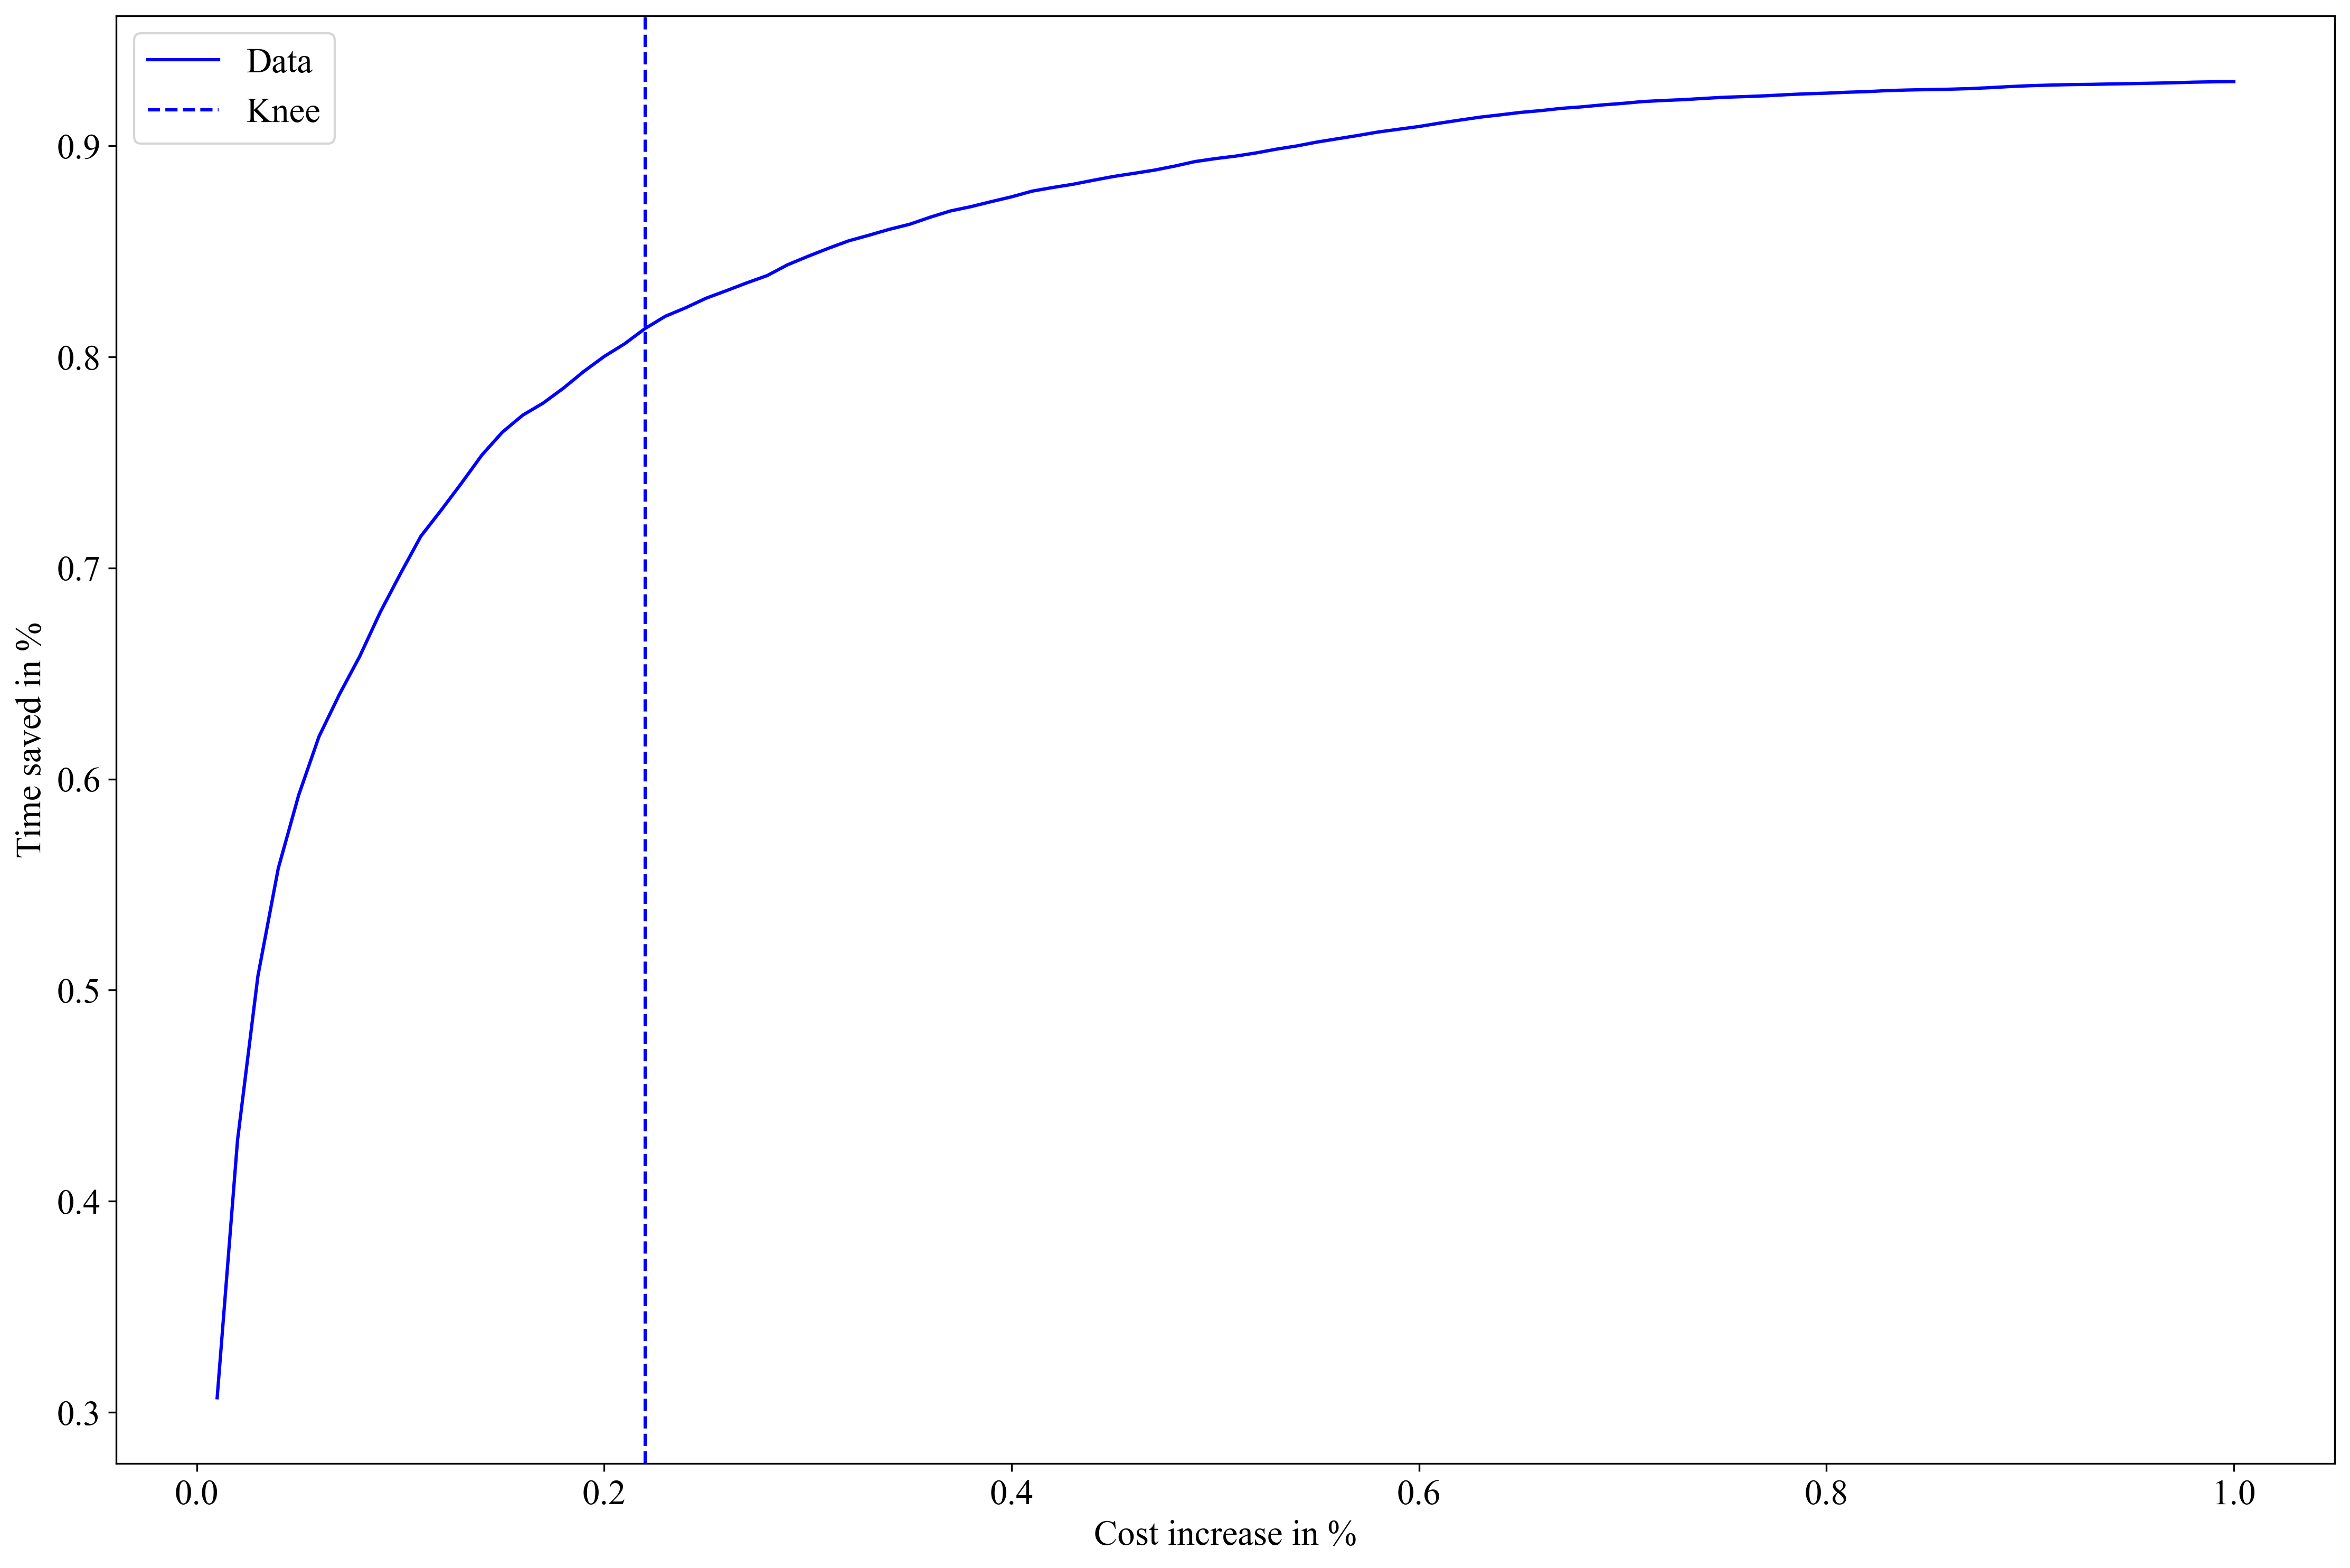

In [9]:
plot_knee(savings)

In [10]:
file

,Dataset,Mean_Dist_Matrix,Std_Dist_Matrix,CV_Dist_Matrix,Mean_Distance_Depot_Centroid,Number_of_clusters,Customer_Time_Window_Mean,Customer_Time_Window_Std,Number_of_customers,Number_of_vehicles,...,Time_Array,Task_Array,planned_pct,Complete,final_cost_pct,complete_index,complete_time,complete_cost,complete_cost_pct,savings
0,task_num-100_task_tw_mean-137.0_task_tw_std-0....,46504.812600,36378.827441,0.782259,33.346470,9,137.000000,0.000000,100,365,...,0.000599 0.055533 0.056284 0.056393 0.056508 0...,0 1 2 3 4 5 6 7 8 8 8 8 9 10 11 12 13 14 15 16...,1.0,True,0.0 0.15432265805886664 0.15618740184578736 0....,109,0.239858,31597.829044,2.440030,0.7273801346490743 0.8755306400421384 0.884098...
1,task_num-100_task_tw_mean-137.0_task_tw_std-0....,49591.653500,34024.118614,0.686086,33.731705,11,137.000000,0.000000,100,193,...,0.000334 0.028404 0.029085 0.029191 0.029295 0...,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...,1.0,True,0.0 0.3263518728844721 0.3348885254717831 0.34...,126,0.674250,53900.621956,3.146976,0.19693897745927072 0.19693897745927072 0.1973...
2,task_num-100_task_tw_mean-137.0_task_tw_std-0....,55414.469700,38862.701772,0.701310,36.054755,9,137.000000,0.000000,100,23,...,0.000214 0.007563 0.008368 0.008468 0.008548 0...,0 1 2 3 4 5 6 7 8 9 10 11 12 13 13 13 13 14 15...,1.0,True,0.0 0.08215373347719292 0.08387800442491605 0....,119,0.456862,60577.655622,1.738643,0.7279114817592206 0.7279114817592206 0.727911...
3,task_num-100_task_tw_mean-137.0_task_tw_std-0....,31732.725500,20209.109221,0.636854,33.697944,9,137.000000,0.000000,100,23,...,0.000113 0.005128 0.005656 0.005742 0.005833 0...,0 1 2 3 4 5 6 7 8 9 10 11 11 11 11 12 13 14 15...,1.0,True,0.0 0.05265447753565161 0.0509377247912854 0.0...,124,0.640583,38976.363456,1.818612,0.032387390580468196 0.31336530645812766 0.381...
4,task_num-100_task_tw_mean-137.0_task_tw_std-0....,41725.843700,37050.436075,0.887949,34.574488,10,137.000000,0.000000,100,365,...,0.000518 0.05243 0.052992 0.053102 0.061176 0....,0 1 2 3 4 5 6 7 8 9 10 11 12 13 13 14 15 16 17...,1.0,True,0.0 0.04167414207840335 0.04350970776165658 0....,109,0.278905,69852.269678,2.535966,0.5028383193959871 0.5299983004742614 0.538845...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,task_num-100_task_tw_mean-98.983925189_task_tw...,45733.987500,36704.127994,0.802557,34.546622,12,98.983333,56.250348,100,193,...,0.00031 0.028199 0.028892 0.029003 0.029109 0....,0 1 2 3 4 5 6 7 7 8 9 10 11 12 13 14 15 16 17 ...,1.0,True,0.0 0.13646513733395818 0.1389476071440453 0.1...,107,0.229432,26383.158500,1.805176,0.026163145547010176 0.026210594412794483 0.08...
512,task_num-1050_task_tw_mean-108.34879679_task_t...,39974.416917,30451.568136,0.761776,34.463022,25,108.348603,62.500295,1050,193,...,0.000561 0.374399 0.376721 0.378775 0.378889 0...,0 1 2 3 4 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...,1.0,True,0.0 0.012380190650336428 0.012103922930884836 ...,1288,18.509684,266018.954233,1.564757,0.06713360097519486 0.2765493122548943 0.44668...
513,task_num-1050_task_tw_mean-120.09884644_task_t...,48402.421269,34842.645994,0.719853,35.146427,30,120.098873,68.750064,1050,193,...,0.000619 0.343938 0.345928 0.346016 0.347378 0...,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 14 14 15 16...,1.0,True,0.0 0.012114705816093217 0.012239754296205428 ...,1286,18.544938,269888.721344,1.615514,0.059914500051416006 0.6229522877785706 0.7142...
514,task_num-1050_task_tw_mean-137.0_task_tw_std-7...,27898.129181,20483.200319,0.734214,33.345284,21,137.000063,78.665703,1050,193,...,0.000663 0.363398 0.365979 0.36606 0.366176 0....,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...,1.0,True,0.0 0.014080379632176485 0.014281035309392313 ...,1378,22.739110,227543.584267,1.439495,0.05392526187100042 0.1240867079747191 0.48043...


In [11]:
file['time_saved_22']=file.apply(lambda x: perc_time_saved(0.22, x['Time_Array'], x['Cost_Array'], x['Task_Array'])[0], axis=1)
file['time_22']=file.apply(lambda x: perc_time_saved(0.22, x['Time_Array'], x['Cost_Array'], x['Task_Array'])[1], axis=1)
file['iteration_22']=file.apply(lambda x: perc_time_saved(0.22, x['Time_Array'], x['Cost_Array'], x['Task_Array'])[3], axis=1)
file['cost_22']=file.apply(lambda x: perc_time_saved(0.22, x['Time_Array'], x['Cost_Array'], x['Task_Array'])[2], axis=1)

In [23]:
plot_cost(file,'time', False, 'Number_of_customers', 0.01, 'complete')

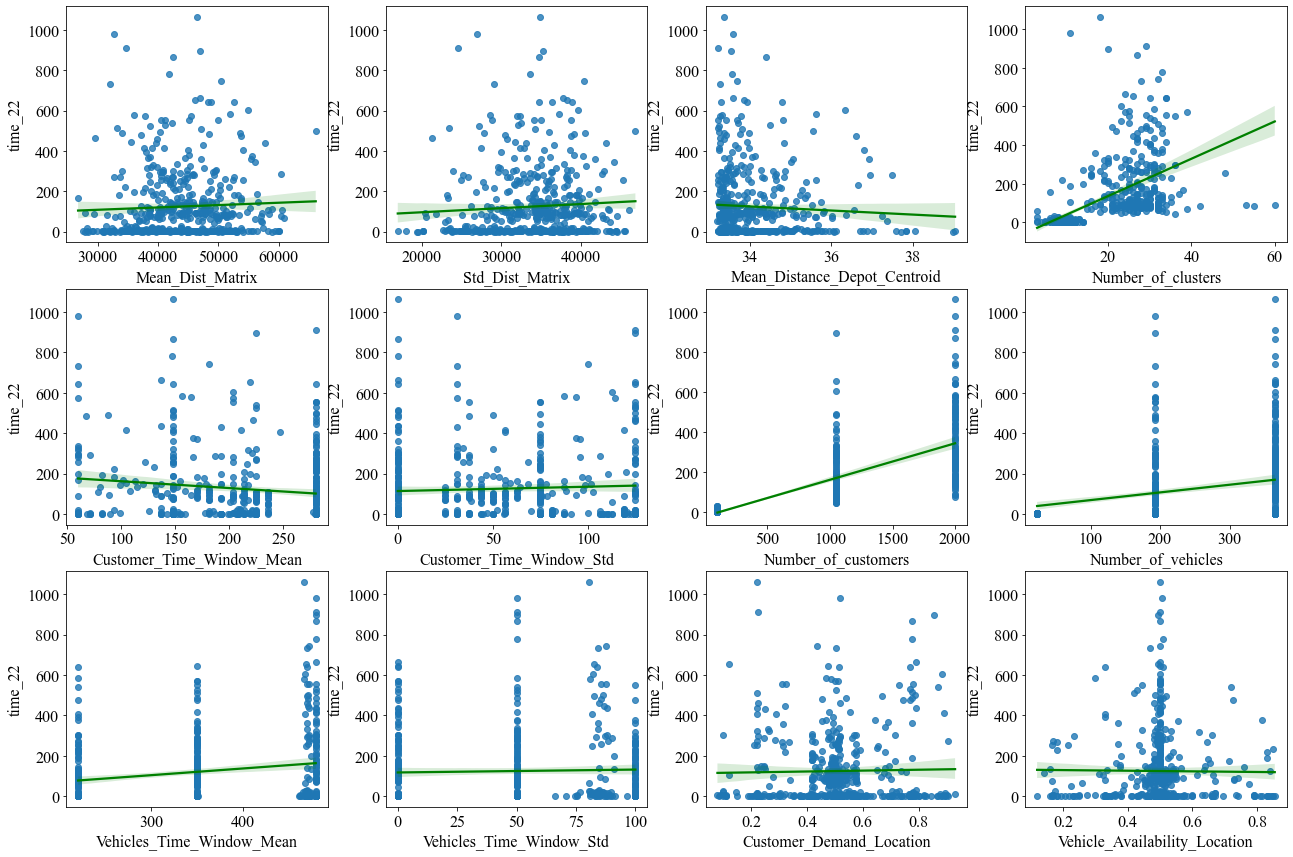

In [13]:
plot12_hist_regression(file,'time_22')

# Linear Regression and ANOVA

In [27]:
interest_columns = [
    'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
    'Number_of_customers', 'Number_of_vehicles',
    'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
    'Vehicle_Availability_Location', "time_22"]


In [28]:
sc = StandardScaler()
data = sc.fit_transform(file[interest_columns[:-1]])
data = pd.DataFrame(data, columns=interest_columns[:-1])

In [31]:
for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 2):
    data[x[0]+"X"+x[1]] = data[x[0]]*data[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 1):
    data[x[0]+"X"+x[0]] = data[x[0]]*data[x[0]]

data['time_22'] = file['time_22']


In [32]:
cols = [i for i in data.columns if i!="time_22"]

In [36]:
model = ols("time_22 ~ "+'+'.join(cols), data)
output = model.fit()
print(output.summary())
print("\nRetrieving manually the parameter estimates:")
print(output._results.params)

                            OLS Regression Results                            
Dep. Variable:                time_22   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     38.65
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          9.75e-129
Time:                        08:45:41   Log-Likelihood:                -3005.7
No. Observations:                 516   AIC:                             6101.
Df Residuals:                     471   BIC:                             6293.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [37]:
anova_results = anova_lm(output)
print('\nANOVA results')
print(anova_results)


ANOVA results
                                                       df        sum_sq  \
Customer_Time_Window_Mean                             1.0  2.787513e+05   
Customer_Time_Window_Std                              1.0  1.019024e+05   
Number_of_customers                                   1.0  9.232743e+06   
Number_of_vehicles                                    1.0  5.774962e+04   
Vehicles_Time_Window_Mean                             1.0  3.343518e+05   
Vehicles_Time_Window_Std                              1.0  2.423785e+04   
Customer_Demand_Location                              1.0  2.865726e+04   
Vehicle_Availability_Location                         1.0  1.337109e+04   
Customer_Demand_LocationXVehicle_Availability_L...    1.0  6.199270e+02   
Customer_Demand_LocationXCustomer_Time_Window_Mean    1.0  2.081735e+03   
Customer_Demand_LocationXCustomer_Time_Window_Std     1.0  2.122212e+03   
Customer_Demand_LocationXNumber_of_customers          1.0  8.993588e+04   
Customer_D

In [38]:
list_forward = forward_selection(data[cols], data['time_22'])

Add  Number_of_customers            with p-value 3.65359e-97
Add  Customer_Demand_LocationXCustomer_Demand_Location with p-value 1.92136e-12
Add  Customer_Time_Window_MeanXNumber_of_customers with p-value 1.61916e-11
Add  Customer_Time_Window_MeanXCustomer_Time_Window_Mean with p-value 1.66559e-08
Add  Customer_Time_Window_StdXNumber_of_customers with p-value 1.69709e-07
Add  Vehicles_Time_Window_MeanXVehicles_Time_Window_Std with p-value 7.37008e-06
Add  Vehicles_Time_Window_Mean      with p-value 9.52956e-06
Add  Number_of_customersXVehicles_Time_Window_Mean with p-value 1.01376e-06
Add  Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean with p-value 0.000248632
Add  Customer_Time_Window_Std       with p-value 0.000569926
Add  Customer_Time_Window_Mean      with p-value 0.000726043
Add  Number_of_customersXNumber_of_vehicles with p-value 0.00423575
Add  Number_of_vehicles             with p-value 0.00171722
Add  Vehicles_Time_Window_Std       with p-value 0.00340201
Add  Customer_Ti

In [39]:
list_backward = backward_selection(data[cols],data['time_22'])

Drop  Vehicle_Availability_LocationXNumber_of_vehicles with p-value 0.804524
Drop  Customer_Time_Window_StdXVehicles_Time_Window_Mean with p-value 0.72847
Drop  Vehicle_Availability_LocationXVehicles_Time_Window_Mean with p-value 0.703503
Drop  Vehicle_Availability_LocationXVehicle_Availability_Location with p-value 0.627822
Drop  Customer_Demand_LocationXNumber_of_vehicles with p-value 0.621641
Drop  Vehicle_Availability_LocationXCustomer_Time_Window_Std with p-value 0.593513
Drop  Number_of_vehiclesXNumber_of_vehicles with p-value 0.575129
Drop  Customer_Time_Window_MeanXNumber_of_vehicles with p-value 0.482009
Drop  Customer_Time_Window_StdXVehicles_Time_Window_Std with p-value 0.446961
Drop  Vehicle_Availability_LocationXCustomer_Time_Window_Mean with p-value 0.432342
Drop  Vehicle_Availability_LocationXVehicles_Time_Window_Std with p-value 0.400427
Drop  Customer_Demand_LocationXVehicles_Time_Window_Std with p-value 0.365279
Drop  Number_of_vehiclesXVehicles_Time_Window_Mean with 

In [40]:
list(set(list_backward) & set(list_forward))

['Customer_Time_Window_Std',
 'Customer_Time_Window_MeanXVehicles_Time_Window_Mean',
 'Number_of_customersXVehicles_Time_Window_Mean',
 'Vehicles_Time_Window_Std',
 'Customer_Demand_Location',
 'Vehicles_Time_Window_Mean',
 'Customer_Demand_LocationXNumber_of_customers',
 'Customer_Demand_LocationXCustomer_Demand_Location',
 'Customer_Time_Window_MeanXNumber_of_customers',
 'Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean',
 'Vehicles_Time_Window_MeanXVehicles_Time_Window_Std',
 'Number_of_customers',
 'Number_of_vehicles',
 'Number_of_vehiclesXVehicles_Time_Window_Std',
 'Customer_Time_Window_Mean',
 'Number_of_customersXNumber_of_vehicles',
 'Customer_Time_Window_StdXNumber_of_customers',
 'Customer_Time_Window_MeanXCustomer_Time_Window_Mean']

In [41]:
set(list_backward)-set(list_forward)

set()

In [42]:
model = ols("time_22 ~ "+'+'.join(list_forward), data)
output = model.fit()
print(output.summary())
print("\nRetrieving manually the parameter estimates:")
print(output._results.params)


                            OLS Regression Results                            
Dep. Variable:                time_22   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.26
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          1.43e-144
Time:                        08:46:09   Log-Likelihood:                -3023.4
No. Observations:                 516   AIC:                             6085.
Df Residuals:                     497   BIC:                             6165.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [43]:
anova_results = anova_lm(output)
print('\nANOVA results')
print(anova_results)


ANOVA results
                                                       df        sum_sq  \
Number_of_customers                                   1.0  9.161658e+06   
Customer_Demand_LocationXCustomer_Demand_Location     1.0  6.281090e+05   
Customer_Time_Window_MeanXNumber_of_customers         1.0  5.252216e+05   
Customer_Time_Window_MeanXCustomer_Time_Window_...    1.0  3.423795e+05   
Customer_Time_Window_StdXNumber_of_customers          1.0  2.779691e+05   
Vehicles_Time_Window_MeanXVehicles_Time_Window_Std    1.0  1.953001e+05   
Vehicles_Time_Window_Mean                             1.0  1.835857e+05   
Number_of_customersXVehicles_Time_Window_Mean         1.0  2.148678e+05   
Vehicles_Time_Window_MeanXVehicles_Time_Window_...    1.0  1.165173e+05   
Customer_Time_Window_Std                              1.0  1.007058e+05   
Customer_Time_Window_Mean                             1.0  9.486020e+04   
Number_of_customersXNumber_of_vehicles                1.0  6.675927e+04   
Number_of_

# Modelling with all main, interaction and quadratic effects

In [44]:
x_train, x_test, y_train, y_test = train_test_split(
    file[interest_columns[:-1]], file['time_22'], test_size=0.3, random_state=123)


In [45]:
sc = StandardScaler()
data = sc.fit_transform(x_train)
x_train = pd.DataFrame(data, columns=interest_columns[:-1])

data = sc.transform(x_test)
x_test = pd.DataFrame(data, columns=interest_columns[:-1])


In [46]:
for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 2):
    x_train[x[0]+"X"+x[1]] = x_train[x[0]]*x_train[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 1):
    x_train[x[0]+"X"+x[0]] = x_train[x[0]]*x_train[x[0]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 2):
    x_test[x[0]+"X"+x[1]] = x_test[x[0]]*x_test[x[1]]

for x in itertools.combinations(['Customer_Demand_Location', 'Vehicle_Availability_Location', 'Customer_Time_Window_Mean',
                                 'Customer_Time_Window_Std', 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std'], 1):
    x_test[x[0]+"X"+x[0]] = x_test[x[0]]*x_test[x[0]]


## Gamma Regression

In [48]:
grid = {"alpha": [0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}
gr = GammaRegressor()
gr_cv = GridSearchCV(gr, grid, cv=KFold(10, random_state=123, shuffle=True))
gr_cv.fit(x_train, y_train)
print("tuned hyperparameters :(best parameters) ", gr_cv.best_params_)
print("accuracy :", gr_cv.best_score_)

tuned hyperparameters :(best parameters)  {'alpha': 0.05}
accuracy : 0.820290673599352


In [49]:
gr = GammaRegressor(alpha=0.05)
gr.fit(x_train, y_train)
y_pred = gr.predict(x_test)
y_pred_train = gr.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.7254802547503122
####################################################
R-squared: 0.48097054477160794
Adjusted R-squared: 0.27335876268025106
MAE : 53.581775692481884
MAE% : 0.4179333413241428
MAPE : 1.068063245452734
RMSE: 119.08008585317882
Explained variance ratio: 0.4811866512497439
####################################################



## Linear Regression

In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.7503747982257154
####################################################
R-squared: 0.7501913079150512
Adjusted R-squared: 0.6502678310810717
MAE : 58.85914419662396
MAE% : 0.4555695289739902
MAPE : 13.342832533274592
RMSE: 82.61271770645304
Explained variance ratio: 0.7506200197560124
####################################################



## KNN Regression

In [53]:
grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                        20, 25, 30, 40, 50], "weights": ['distance', 'uniform']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 4, 'weights': 'distance'}
accuracy : 0.6061816256982209


In [54]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.9999999596645012
####################################################
R-squared: 0.7540683163604497
Adjusted R-squared: 0.6556956429046296
MAE : 51.741252630951564
MAE% : 0.4257723029080724
MAPE : 7.178647831533053
RMSE: 81.96913989823663
Explained variance ratio: 0.7547305059682751
####################################################



## SVR poly kernel

In [55]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['poly'], 'degree': [1, 2, 3]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [56]:
svc = SVR(C=372.7593720314938, degree=2, kernel='poly')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.8871771273977339
####################################################
R-squared: 0.7110216611277317
Adjusted R-squared: 0.5954303255788244
MAE : 49.57358524533941
MAE% : 0.39741287258591834
MAPE : 7.196394174845594
RMSE: 88.85375412381445
Explained variance ratio: 0.7110609399867436
####################################################



## SVR rbf kernel

In [57]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['rbf'], 'gamma': [
    'auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=s

In [58]:
svc = SVR(C=1000, gamma=0.01, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.7503747982257154
####################################################
R-squared: 0.7501913079150512
Adjusted R-squared: 0.6502678310810717
MAE : 58.85914419662396
MAE% : 0.4555695289739902
MAPE : 13.342832533274592
RMSE: 82.61271770645304
Explained variance ratio: 0.7506200197560124
####################################################



## Random Forest

In [59]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [20, 16, 12, 8, 4],
          'max_features': ['sqrt', 'log2', None]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_

In [60]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [20],
          'max_features': [44, 30, 20, 15, 10, 5, 3, 2, 1]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.8s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.9s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.9s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=20, max_features=44, n_estimators=200; total time=   0.8s
[CV] END ....max_depth=20, max_features=30, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=20, max_features=30, n_es

In [80]:
rf = RandomForestRegressor(max_depth=20, max_features=10, n_estimators=200,random_state=123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.9567413302640464
####################################################
R-squared: 0.7893772411558331
Adjusted R-squared: 0.7051281376181663
MAE : 43.26490216433193
MAE% : 0.32483759123178924
MAPE : 1.6876683291239127
RMSE: 75.85702129778981
Explained variance ratio: 0.791388470837365
####################################################



# Modelling with limited variables

## Gamma Regression

In [63]:
grid = {"alpha": [0, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]}
gr = GammaRegressor()
gr_cv = GridSearchCV(gr, grid, cv=KFold(10, random_state=123, shuffle=True))
gr_cv.fit(x_train[list_forward], y_train)
print("tuned hyperparameters :(best parameters) ", gr_cv.best_params_)
print("accuracy :", gr_cv.best_score_)

tuned hyperparameters :(best parameters)  {'alpha': 0.03}
accuracy : 0.7369467617024226


In [65]:
gr = GammaRegressor(alpha=0.03)
gr.fit(x_train[list_forward], y_train)
y_pred = gr.predict(x_test[list_forward])
y_pred_train = gr.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: -3.290919859699759
####################################################
R-squared: -3.9336392298482306
Adjusted R-squared: -4.5866208926222605
MAE : 141.28909028941757
MAE% : 0.6225626965757659
MAPE : 1.904792491968809
RMSE: 367.1358808363194
Explained variance ratio: -3.5589899531571536
####################################################



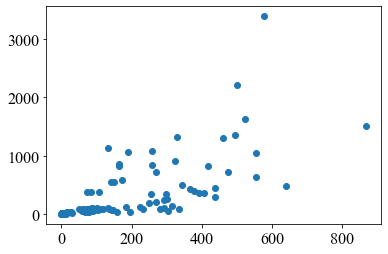

In [67]:
plt.scatter(y_test,y_pred)

## Linear Regression

In [69]:
lr = LinearRegression()
lr.fit(x_train[list_forward], y_train)
y_pred = lr.predict(x_test[list_forward])
y_pred_train = lr.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: 0.7530737131077714
####################################################
R-squared: 0.7500773921502346
Adjusted R-squared: 0.7169993999348245
MAE : 56.793078544210445
MAE% : 0.44041795673969997
MAPE : 12.152778391416495
RMSE: 82.63155175545528
Explained variance ratio: 0.750446605802271
####################################################



## KNN

In [70]:
grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                        20, 25, 30, 40, 50], "weights": ['distance', 'uniform']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train[list_forward], y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 4, 'weights': 'distance'}
accuracy : 0.68708097708086


In [71]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')
knn.fit(x_train[list_forward], y_train)
y_pred = knn.predict(x_test[list_forward])
y_pred_train = knn.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: 0.9999999974907265
####################################################
R-squared: 0.7372049639460321
Adjusted R-squared: 0.7024232679977128
MAE : 41.72744730146519
MAE% : 0.37095505820100994
MAPE : 3.1125732630258494
RMSE: 84.73283071543742
Explained variance ratio: 0.7436700329441923
####################################################



## SVR poly kernel

In [72]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['poly'], 'degree': [1, 2, 3]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train[list_forward], y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [73]:
svc = SVR(C=372.7593720314938, degree=2, kernel='poly')
svc.fit(x_train[list_forward], y_train)
y_pred = svc.predict(x_test[list_forward])
y_pred_train = svc.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: 0.8941220522045874
####################################################
R-squared: 0.6523066638516373
Adjusted R-squared: 0.6062884281849422
MAE : 47.92167643645286
MAE% : 0.39349267755987044
MAPE : 4.0527231360659
RMSE: 97.46334670457581
Explained variance ratio: 0.6528897459128731
####################################################



## SVR rbf kernel

In [74]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['rbf'], 'gamma': [
    'auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train[list_forward], y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=s

In [75]:
svc = SVR(C=1000, gamma=0.01, kernel='rbf')
svc.fit(x_train[list_forward], y_train)
y_pred = svc.predict(x_test[list_forward])
y_pred_train = svc.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: 0.8787880680746124
####################################################
R-squared: 0.8058073517298112
Adjusted R-squared: 0.7801053835764039
MAE : 37.7701737534952
MAE% : 0.30517954967370853
MAPE : 1.162180914660107
RMSE: 72.83825433030725
Explained variance ratio: 0.8059556572256921
####################################################



## Random Forest

In [76]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [20, 16, 12, 8, 4],
          'max_features': ['sqrt', 'log2', None]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train[list_forward], y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.6s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_

In [77]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [12],
          'max_features': [15, 10, 5, 3, 2, 1]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train[list_forward], y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.5s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.4s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=10, n_estimators=200; total time=   0.3s
[CV] END ....max_depth=12, max_features=10, n_es

In [81]:
rf = RandomForestRegressor(max_depth=12, max_features=5, n_estimators=200,random_state=123)
rf.fit(x_train[list_forward], y_train)
y_pred = rf.predict(x_test[list_forward])
y_pred_train = rf.predict(x_train[list_forward])
give_measure_of_fit(x_train[list_forward],y_train,y_pred_train,x_test[list_forward],y_test,y_pred)

Training Adjusted R-squared: 0.9620635803551857
####################################################
R-squared: 0.7952968759597902
Adjusted R-squared: 0.7682038154250566
MAE : 42.328606341352696
MAE% : 0.3228194563479221
MAPE : 1.9833298238566612
RMSE: 74.78342851260953
Explained variance ratio: 0.7963425547974419
####################################################



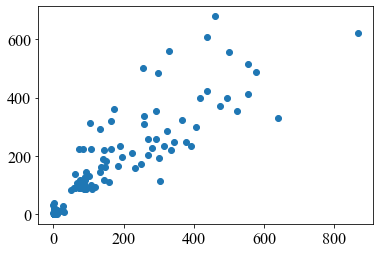

In [82]:
plt.scatter(y_test, rf.predict(x_test[list_forward]))

# Linear Regression and ANOVA with 12 variables

In [83]:
interest_columns = ['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                    'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                    'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                    'Number_of_customers', 'Number_of_vehicles',
                    'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                    'Vehicle_Availability_Location', "time_22"]

In [84]:
sc = StandardScaler()
data = sc.fit_transform(file[interest_columns[:-1]])
data = pd.DataFrame(data, columns=interest_columns[:-1])

In [85]:
for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 2):
    data[x[0]+"X"+x[1]] = data[x[0]]*data[x[1]]

for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 1):
    data[x[0]+"X"+x[0]] = data[x[0]]*data[x[0]]

data['time_22'] = file['time_22']

In [87]:
cols = [i for i in data.columns if i != 'time_22']

In [89]:
model = ols("time_22 ~ "+'+'.join(cols), data)
output = model.fit()
print(output.summary())
print("\nRetrieving manually the parameter estimates:")
print(output._results.params)


                            OLS Regression Results                            
Dep. Variable:                time_22   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     19.20
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          8.81e-105
Time:                        09:17:17   Log-Likelihood:                -2981.4
No. Observations:                 516   AIC:                             6145.
Df Residuals:                     425   BIC:                             6531.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [90]:
anova_results = anova_lm(output)
print('\nANOVA results')
print(anova_results)


ANOVA results
                                                       df        sum_sq  \
Mean_Dist_Matrix                                      1.0  3.401685e+04   
Std_Dist_Matrix                                       1.0  3.309573e+04   
Mean_Distance_Depot_Centroid                          1.0  1.347824e+05   
Number_of_clusters                                    1.0  4.720202e+06   
Customer_Time_Window_Mean                             1.0  2.081208e+05   
...                                                   ...           ...   
Vehicles_Time_Window_MeanXVehicles_Time_Window_...    1.0  9.052258e+04   
Vehicles_Time_Window_StdXVehicles_Time_Window_Std     1.0  3.407078e+04   
Customer_Demand_LocationXCustomer_Demand_Location     1.0  2.512565e+05   
Vehicle_Availability_LocationXVehicle_Availabil...    1.0  5.556366e+03   
Residual                                            425.0  3.153204e+06   

                                                         mean_sq           F  \
Mean

In [92]:
list_forward = forward_selection(data[cols], data['time_22'])

Add  Number_of_customers            with p-value 3.65359e-97
Add  Customer_Demand_LocationXCustomer_Demand_Location with p-value 1.92136e-12
Add  Customer_Time_Window_MeanXNumber_of_customers with p-value 1.61916e-11
Add  Customer_Time_Window_MeanXCustomer_Time_Window_Mean with p-value 1.66559e-08
Add  Customer_Time_Window_StdXNumber_of_customers with p-value 1.69709e-07
Add  Vehicles_Time_Window_MeanXVehicles_Time_Window_Std with p-value 7.37008e-06
Add  Vehicles_Time_Window_Mean      with p-value 9.52956e-06
Add  Number_of_customersXVehicles_Time_Window_Mean with p-value 1.01376e-06
Add  Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean with p-value 0.000248632
Add  Customer_Time_Window_Std       with p-value 0.000569926
Add  Customer_Time_Window_Mean      with p-value 0.000726043
Add  Number_of_clustersXNumber_of_vehicles with p-value 0.00171948
Add  Number_of_vehicles             with p-value 0.00122472
Add  Vehicles_Time_Window_Std       with p-value 0.00301157
Add  Customer_Tim

In [94]:
list_backward = backward_selection(data[cols], data['time_22'])

Drop  Number_of_vehiclesXVehicle_Availability_Location with p-value 0.986364
Drop  Mean_Distance_Depot_Centroid   with p-value 0.938768
Drop  Mean_Distance_Depot_CentroidXCustomer_Time_Window_Mean with p-value 0.925922
Drop  Vehicles_Time_Window_MeanXVehicle_Availability_Location with p-value 0.896587
Drop  Number_of_vehiclesXVehicles_Time_Window_Mean with p-value 0.88854
Drop  Mean_Distance_Depot_CentroidXVehicle_Availability_Location with p-value 0.881382
Drop  Mean_Dist_MatrixXVehicles_Time_Window_Std with p-value 0.869312
Drop  Std_Dist_Matrix                with p-value 0.859392
Drop  Mean_Distance_Depot_CentroidXMean_Distance_Depot_Centroid with p-value 0.840696
Drop  Customer_Time_Window_StdXVehicles_Time_Window_Mean with p-value 0.838492
Drop  Customer_Time_Window_MeanXVehicle_Availability_Location with p-value 0.839928
Drop  Mean_Distance_Depot_CentroidXNumber_of_customers with p-value 0.821232
Drop  Mean_Dist_MatrixXNumber_of_clusters with p-value 0.831564
Drop  Mean_Distance

In [95]:
list(set(list_backward) & set(list_forward))

['Customer_Time_Window_MeanXVehicles_Time_Window_Mean',
 'Number_of_customersXVehicles_Time_Window_Mean',
 'Vehicles_Time_Window_MeanXVehicles_Time_Window_Std',
 'Customer_Time_Window_StdXNumber_of_customers',
 'Vehicles_Time_Window_Mean',
 'Number_of_customers',
 'Number_of_vehiclesXVehicles_Time_Window_Std',
 'Customer_Time_Window_Mean',
 'Customer_Time_Window_Std',
 'Std_Dist_MatrixXVehicles_Time_Window_Std',
 'Number_of_clustersXCustomer_Demand_Location',
 'Number_of_vehicles',
 'Customer_Time_Window_MeanXCustomer_Time_Window_Mean',
 'Customer_Demand_Location',
 'Number_of_clustersXNumber_of_vehicles',
 'Vehicles_Time_Window_Std',
 'Customer_Time_Window_MeanXNumber_of_customers',
 'Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean',
 'Customer_Demand_LocationXCustomer_Demand_Location']

In [97]:
set(list_backward)-set(list_forward)

{'Mean_Dist_MatrixXCustomer_Time_Window_Std',
 'Number_of_customersXNumber_of_customers',
 'Number_of_customersXVehicle_Availability_Location',
 'Std_Dist_MatrixXCustomer_Time_Window_Std',
 'Std_Dist_MatrixXNumber_of_clusters',
 'Std_Dist_MatrixXNumber_of_customers',
 'Std_Dist_MatrixXStd_Dist_Matrix',
 'Vehicles_Time_Window_StdXVehicles_Time_Window_Std'}

In [96]:
set(list_forward)-set(list_backward)

set()

In [98]:
model = ols(
    "time_22 ~ "+'+'.join(list(set(list_backward) & set(list_forward))), data)
output = model.fit()
print(output.summary())
print("\nRetrieving manually the parameter estimates:")
print(output._results.params)


                            OLS Regression Results                            
Dep. Variable:                time_22   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     88.10
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          2.72e-145
Time:                        09:19:00   Log-Likelihood:                -3019.2
No. Observations:                 516   AIC:                             6078.
Df Residuals:                     496   BIC:                             6163.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [99]:
anova_results = anova_lm(output)
print('\nANOVA results')
print(anova_results)


ANOVA results
                                                       df        sum_sq  \
Customer_Time_Window_MeanXVehicles_Time_Window_...    1.0  8.456910e+04   
Number_of_customersXVehicles_Time_Window_Mean         1.0  4.823563e+05   
Vehicles_Time_Window_MeanXVehicles_Time_Window_Std    1.0  8.062192e+04   
Customer_Time_Window_StdXNumber_of_customers          1.0  7.405873e+04   
Vehicles_Time_Window_Mean                             1.0  8.718958e+05   
Number_of_customers                                   1.0  8.551233e+06   
Number_of_vehiclesXVehicles_Time_Window_Std           1.0  4.128088e+04   
Customer_Time_Window_Mean                             1.0  2.651391e+05   
Customer_Time_Window_Std                              1.0  2.088938e+05   
Std_Dist_MatrixXVehicles_Time_Window_Std              1.0  1.775414e+04   
Number_of_clustersXCustomer_Demand_Location           1.0  3.120961e+04   
Number_of_vehicles                                    1.0  7.677079e+04   
Customer_T

# Modelling with all main, interaction and quadratic effects of 12 variables

In [100]:
x_train, x_test, y_train, y_test = train_test_split(
    file[interest_columns[:-1]], file['time_22'], test_size=0.3, random_state=123)
sc = StandardScaler()

In [101]:
data = sc.fit_transform(x_train)
x_train = pd.DataFrame(data, columns=interest_columns[:-1])

data = sc.transform(x_test)
x_test = pd.DataFrame(data, columns=interest_columns[:-1])

In [102]:
for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 2):
    x_train[x[0]+"X"+x[1]] = x_train[x[0]]*x_train[x[1]]

for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 1):
    x_train[x[0]+"X"+x[0]] = x_train[x[0]]*x_train[x[0]]

for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 2):
    x_test[x[0]+"X"+x[1]] = x_test[x[0]]*x_test[x[1]]

for x in itertools.combinations(['Mean_Dist_Matrix', 'Std_Dist_Matrix',
                                 'Mean_Distance_Depot_Centroid', 'Number_of_clusters',
                                 'Customer_Time_Window_Mean', 'Customer_Time_Window_Std',
                                 'Number_of_customers', 'Number_of_vehicles',
                                 'Vehicles_Time_Window_Mean', 'Vehicles_Time_Window_Std', 'Customer_Demand_Location',
                                 'Vehicle_Availability_Location'], 1):
    x_test[x[0]+"X"+x[0]] = x_test[x[0]]*x_test[x[0]]

## Gamma Regression

In [105]:
grid = {"alpha": [0, 0.02, 0.1, 0.15]}
gr = GammaRegressor()
gr_cv = GridSearchCV(gr, grid, cv=KFold(10, random_state=123, shuffle=True))
gr_cv.fit(x_train, y_train)
print("tuned hyperparameters :(best parameters) ", gr_cv.best_params_)
print("accuracy :", gr_cv.best_score_)

c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\johanr\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sca

tuned hyperparameters :(best parameters)  {'alpha': 0.1}
accuracy : 0.7846626647947248


In [106]:
gr = GammaRegressor(alpha=0.1)
gr.fit(x_train, y_train)
y_pred = gr.predict(x_test)
y_pred_train = gr.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.7007324421335327
####################################################
R-squared: 0.5798234959255733
Adjusted R-squared: -0.011049712929089406
MAE : 54.20066190337675
MAE% : 0.42756448417600723
MAPE : 1.1595680570391584
RMSE: 107.14181972177182
Explained variance ratio: 0.579859325188253
####################################################



## Linear Regression

In [107]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.7425763194914996
####################################################
R-squared: 0.6915475218112295
Adjusted R-squared: 0.2577862243582709
MAE : 62.371928250724146
MAE% : 0.4874967432292345
MAPE : 13.684323642133604
RMSE: 91.79885588389617
Explained variance ratio: 0.691719340282716
####################################################



## KNN regression

In [110]:
grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                        20, 25, 30, 40, 50], "weights": ['distance', 'uniform']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 5, 'weights': 'distance'}
accuracy : 0.5067880023924135


In [113]:
knn = KNeighborsRegressor(n_neighbors=2, weights='distance')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.9999999999999999
####################################################
R-squared: 0.6231977489775402
Adjusted R-squared: 0.09331958347720615
MAE : 58.44361639391291
MAE% : 0.5001084454619178
MAPE : 5.994557214486902
RMSE: 101.46117345899621
Explained variance ratio: 0.6261066960389128
####################################################



## SVR poly kernel

In [114]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['poly'], 'degree': [1, 2, 3]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)


Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [115]:
svc = SVR(C=372.7593720314938, degree=1, kernel='poly')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.5976459098339413
####################################################
R-squared: 0.7167463447054478
Adjusted R-squared: 0.3184208919474839
MAE : 50.60387284370462
MAE% : 0.4537082694017338
MAPE : 4.264539629973689
RMSE: 87.96925177431461
Explained variance ratio: 0.724171409620666
####################################################



## SVR rbf kernel

In [116]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['rbf'], 'gamma': [
    'auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=s

In [117]:
svc = SVR(C=1000, gamma=0.001, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
y_pred_train = svc.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.640589117102645
####################################################
R-squared: 0.7181812855467156
Adjusted R-squared: 0.32187371834678435
MAE : 51.52750118435731
MAE% : 0.4613138530629759
MAPE : 4.659989433410472
RMSE: 87.74614618558239
Explained variance ratio: 0.7254370287982326
####################################################



## Random Forest

In [118]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [20, 16, 12, 8, 4],
          'max_features': ['sqrt', 'log2', None]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.5s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.8s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=log2, n_

In [119]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [12],
          'max_features': [90, 75, 60, 45, 30, 20, 15, 10, 5, 3, 2, 1]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   3.0s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.4s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.3s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.6s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.0s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.2s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   1.7s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.2s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   2.1s
[CV] END ....max_depth=12, max_features=90, n_estimators=200; total time=   3.0s
[CV] END ....max_depth=12, max_features=75, n_estimators=200; total time=   2.3s
[CV] END ....max_depth=12, max_features=75, n_

In [120]:
rf = RandomForestRegressor(max_depth=12, max_features=30, n_estimators=200,random_state=123)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
give_measure_of_fit(x_train,y_train,y_pred_train,x_test,y_test,y_pred)

Training Adjusted R-squared: 0.9438799003715336
####################################################
R-squared: 0.7546343295889836
Adjusted R-squared: 0.4095888555734918
MAE : 45.78922671240187
MAE% : 0.33627715380734785
MAPE : 1.465005947466135
RMSE: 81.87475933177664
Explained variance ratio: 0.7585845081809898
####################################################



# Model with selected effects from 12 variables

In [121]:
x_train[list(set(list_backward) & set(list_forward))]

,Customer_Time_Window_MeanXVehicles_Time_Window_Mean,Number_of_customersXVehicles_Time_Window_Mean,Vehicles_Time_Window_MeanXVehicles_Time_Window_Std,Customer_Time_Window_StdXNumber_of_customers,Vehicles_Time_Window_Mean,Number_of_customers,Number_of_vehiclesXVehicles_Time_Window_Std,Customer_Time_Window_Mean,Customer_Time_Window_Std,Std_Dist_MatrixXVehicles_Time_Window_Std,Number_of_clustersXCustomer_Demand_Location,Number_of_vehicles,Customer_Time_Window_MeanXCustomer_Time_Window_Mean,Customer_Demand_Location,Number_of_clustersXNumber_of_vehicles,Vehicles_Time_Window_Std,Customer_Time_Window_MeanXNumber_of_customers,Vehicles_Time_Window_MeanXVehicles_Time_Window_Mean,Customer_Demand_LocationXCustomer_Demand_Location
0,-0.340003,1.400899,-1.938367,-1.492178,-1.471980,-0.951711,1.317367,0.230983,1.567891,-0.637393,-1.109140,1.000397,0.053353,1.295487,-0.856497,1.316843,-0.219829,2.166724,1.678287
1,-1.522732,1.400895,-1.938378,-0.588629,-1.471975,-0.951711,1.317378,1.034482,0.618496,0.281702,1.561848,1.000397,1.070153,-1.349677,-1.157661,1.316855,-0.984528,2.166712,1.821628
2,1.098962,-1.011025,1.062245,-0.459570,1.062323,-0.951711,-1.833330,1.034490,0.482888,-0.516541,-0.154806,-1.833465,1.070169,0.161845,1.753718,0.999926,-0.984535,1.128531,0.026194
3,1.165966,1.906054,-1.545961,0.816563,1.127098,1.691117,-1.372175,1.034486,0.482854,-0.320752,0.176193,1.000397,1.070161,-1.146203,-0.153780,-1.371630,1.749436,1.270349,1.313781
4,2.809291,-0.544195,-1.938380,-0.072203,-1.471978,0.369703,1.317377,-1.908515,-0.195300,0.151695,-0.481434,1.000397,3.642429,-0.506713,0.950489,1.316854,-0.705584,2.166718,0.256758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,1.086663,1.776409,1.032639,0.816561,1.050436,1.691117,-0.417623,1.034488,0.482853,0.909025,-0.762829,-0.424820,1.070165,-1.175271,-0.275737,0.983058,1.749440,1.103415,1.381261
357,-0.339981,-0.544196,2.019015,0.579650,-1.471982,0.369703,-1.372175,0.230969,1.567881,-0.516917,0.086674,1.000397,0.053346,0.249049,0.348160,-1.371630,0.085390,2.166730,0.062025
358,1.165967,0.416690,-0.030851,0.178512,1.127094,0.369703,-0.027383,1.034489,0.482853,0.002105,-0.210978,1.000397,1.070168,0.830403,-0.254168,-0.027372,0.382454,1.270342,0.689570
359,-1.522749,-0.544199,-1.938425,0.579656,-1.471990,0.369703,1.317396,1.034483,1.567895,1.031833,0.060859,1.000397,1.070154,1.295487,0.046996,1.316873,0.382451,2.166756,1.678287


## Linear Regression

In [122]:
lr = LinearRegression()
lr.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
y_pred = lr.predict(x_test[list(set(list_backward) & set(list_forward))])
y_pred_train = lr.predict(
    x_train[list(set(list_backward) & set(list_forward))])
give_measure_of_fit(x_train[list(set(list_backward) & set(list_forward))],y_train,y_pred_train,x_test[list(set(list_backward) & set(list_forward))],y_test,y_pred)

Training Adjusted R-squared: 0.7569555016557905
####################################################
R-squared: 0.7541876423656755
Adjusted R-squared: 0.7195918290689928
MAE : 56.34170542733256
MAE% : 0.4465872456665363
MAPE : 11.948782130467313
RMSE: 81.9492517801221
Explained variance ratio: 0.7541930369579284
####################################################



## KNN Regression

In [124]:
grid = {"n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                        20, 25, 30, 40, 50], "weights": ['distance', 'uniform']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, grid, cv=KFold(10, random_state=123, shuffle=True))
knn_cv.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 3, 'weights': 'distance'}
accuracy : 0.6794331689775908


In [126]:
knn = KNeighborsRegressor(n_neighbors=3, weights='distance')
knn.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
y_pred = knn.predict(x_test[list(set(list_backward) & set(list_forward))])
y_pred_train = knn.predict(
    x_train[list(set(list_backward) & set(list_forward))])
give_measure_of_fit(x_train[list(set(list_backward) & set(list_forward))],y_train,y_pred_train,x_test[list(set(list_backward) & set(list_forward))],y_test,y_pred)

Training Adjusted R-squared: 0.9999999999999998
####################################################
R-squared: 0.7152915193130902
Adjusted R-squared: 0.6752214368460436
MAE : 44.746663307984534
MAE% : 0.3882487344150524
MAPE : 2.061980060079796
RMSE: 88.19487285527016
Explained variance ratio: 0.7193455246411127
####################################################



## SVR poly kernel

In [127]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['poly'], 'degree': [1, 2, 3]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, degree=

In [128]:
svc = SVR(C=372.7593720314938, degree=2, kernel='poly')
svc.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
y_pred = svc.predict(x_test[list(set(list_backward) & set(list_forward))])
y_pred_train = svc.predict(
    x_train[list(set(list_backward) & set(list_forward))])
give_measure_of_fit(x_train[list(set(list_backward) & set(list_forward))],y_train,y_pred_train,x_test[list(set(list_backward) & set(list_forward))],y_test,y_pred)

Training Adjusted R-squared: 0.906024687442912
####################################################
R-squared: 0.6764618215514316
Adjusted R-squared: 0.6309268186586702
MAE : 52.51217751935401
MAE% : 0.43176876316289026
MAPE : 6.8678964960137145
RMSE: 94.0168951111215
Explained variance ratio: 0.6770939174252433
####################################################



## SVR rbf kernel

In [129]:
grid = {"C": np.logspace(-3, 3, 15), "kernel": ['rbf'], 'gamma': [
    'auto', 'scale', 0.001, 0.01, 0.1, 1, 10, 100]}
svr = SVR()
svr_cv = GridSearchCV(svr, grid, cv=KFold(
    10, random_state=123, shuffle=True), verbose=2)
svr_cv.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
print("tuned hpyerparameters :(best parameters) ", svr_cv.best_params_)
print("accuracy :", svr_cv.best_score_)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.001, gamma=s

In [130]:
svc = SVR(C=1000, gamma=0.01, kernel='rbf')
svc.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
y_pred = svc.predict(x_test[list(set(list_backward) & set(list_forward))])
y_pred_train = svc.predict(
    x_train[list(set(list_backward) & set(list_forward))])
give_measure_of_fit(x_train[list(set(list_backward) & set(list_forward))],y_train,y_pred_train,x_test[list(set(list_backward) & set(list_forward))],y_test,y_pred)

Training Adjusted R-squared: 0.8726949542506272
####################################################
R-squared: 0.8040095548283446
Adjusted R-squared: 0.7764257143967783
MAE : 40.060284070174845
MAE% : 0.3314884546138977
MAPE : 1.7370265517673957
RMSE: 73.17463861263869
Explained variance ratio: 0.8048980855352846
####################################################



## Random Forest

In [131]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [20, 16, 12, 8, 4],
          'max_features': ['sqrt', 'log2', None]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.4s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=20, max_features=log2, n_

In [132]:
rf = RandomForestRegressor(random_state=123)
params = {'n_estimators': [200],
          'max_depth': [12],
          'max_features': [18, 15, 10, 5, 3, 2, 1]}
gs = GridSearchCV(rf, params, verbose=2, cv=KFold(
    10, random_state=123, shuffle=True))
gs.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
print("tuned hpyerparameters :(best parameters) ", gs.best_params_)
print("accuracy :", gs.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.8s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   1.2s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   1.5s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=12, max_features=18, n_estimators=200; total time=   0.7s
[CV] END ....max_depth=12, max_features=15, n_estimators=200; total time=   0.6s
[CV] END ....max_depth=12, max_features=15, n_es

In [136]:
rf = RandomForestRegressor(max_depth=12, max_features=5, n_estimators=200,random_state=123)
rf.fit(x_train[list(set(list_backward) & set(list_forward))], y_train)
y_pred = rf.predict(x_test[list(set(list_backward) & set(list_forward))])
y_pred_train = rf.predict(
    x_train[list(set(list_backward) & set(list_forward))])
give_measure_of_fit(x_train[list(set(list_backward) & set(list_forward))],y_train,y_pred_train,x_test[list(set(list_backward) & set(list_forward))],y_test,y_pred)

Training Adjusted R-squared: 0.9600356128711057
####################################################
R-squared: 0.7954998587618067
Adjusted R-squared: 0.7667183574023573
MAE : 43.99878035159229
MAE% : 0.334318965901995
MAPE : 2.232000800542971
RMSE: 74.7463418417372
Explained variance ratio: 0.7967441666705346
####################################################

